In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import os
import tensorflow.keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
from tqdm import tqdm
from glob import glob
from PIL import Image,ImageOps

In [ ]:
files_list1 = glob("/content/drive/MyDrive/ML1_Course_Project/audio_dataset/train_images/*")
files_list2 = glob("/content/drive/MyDrive/ML1_Course_Project/UTK_128/*")[:1000]

print(len(files_list1))

def get_dataset(files_list1,files_list2,size=(128,128)):
  secret = []
  cover = []
  
  cover_train = []
  secret_train = []

  cover_test = []
  secret_test = []

  trainSplit = 0.7
  secret_split = trainSplit * len(files_list1)
  cover_split = trainSplit * len(files_list2)

  for i in range(len(files_list2)):
    img_cover = Image.open(files_list2[i]).convert("RGB")
    img_cover = img_cover.convert('YCbCr')
    img_cover = np.array(ImageOps.fit(img_cover,size),dtype=np.float32)
    img_cover /= 255.
    if i<200:
      img_secret = Image.open(files_list1[i]).convert("RGB")
      # img_secret = img_secret.convert('YCbCr')
      img_secret = np.array(ImageOps.fit(img_secret,size),dtype=np.float32)
      img_secret /= 255.
      secret_train.append(img_secret)
      cover_train.append(img_cover)
    elif i <800:
      secret_train.append(secret_train[i%200])
      cover_train.append(img_cover)
    else:
      img_secret = Image.open(files_list1[(i-800)%50]).convert("RGB")
      # img_secret = img_secret.convert('YCbCr')
      img_secret = np.array(ImageOps.fit(img_secret,size),dtype=np.float32)
      img_secret /= 255.
      secret_test.append(img_secret)
      cover_test.append(img_cover)
  
  cover_train, secret_train, cover_test, secret_test = np.array(cover_train) , np.array(secret_train), np.array(cover_test) , np.array(secret_test)

  
  return cover_train, secret_train, cover_test, secret_test

250


In [ ]:
cover_train, secret_train, cover_test, secret_test = get_dataset(files_list1, files_list2)
print(cover_train.shape, secret_train.shape, cover_test.shape, secret_test.shape)

def shuffle_dataset(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]
  
cover_train, secret_train = shuffle_dataset(cover_train, secret_train)
cover_test, secret_test = shuffle_dataset(cover_test, secret_test)
print(cover_train.shape, secret_train.shape, cover_test.shape, secret_test.shape)

(800, 128, 128, 3) (800, 128, 128, 3) (200, 128, 128, 3) (200, 128, 128, 3)
(800, 128, 128, 3) (800, 128, 128, 3) (200, 128, 128, 3) (200, 128, 128, 3)


In [ ]:
# cover_train = np.load("/content/drive/MyDrive/ML1_Course_Project/ImageInImageData/Cover_Train_Ycbcr.npy")
# secret_train = np.load("/content/drive/MyDrive/ML1_Course_Project/ImageInImageData/Secret_Train_Ycbcr.npy")
# cover_test = np.load("/content/drive/MyDrive/ML1_Course_Project/ImageInImageData/Cover_Test_Ycbcr.npy")
# secret_test = np.load("/content/drive/MyDrive/ML1_Course_Project/ImageInImageData/Secret_Test_Ycbcr.npy")
# print(cover_train.shape, secret_train.shape, cover_test.shape, secret_test.shape)

In [ ]:
# CNN Architecture

from tensorflow.keras import Input, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate, Activation, Dropout, Flatten, Dense

# def combined_model():
input_shape1 = Input(shape=(128, 128, 3), name = "Audio Image")
input_shape2 = Input(shape=(128, 128, 3), name = "Cover Image")

# Audio Feature Extraction
par1 = Conv2D(50, 3, padding='same', activation='relu')(input_shape1)
par1 = Conv2D(50, 3, padding='same', activation='relu')(par1)
par1 = Conv2D(50, 3, padding='same', activation='relu')(par1)
par1 = Conv2D(50, 3, padding='same', activation='relu')(par1)

par2 = Conv2D(50, 4, padding='same', activation='relu')(input_shape1)
par2 = Conv2D(50, 4, padding='same', activation='relu')(par2)
par2 = Conv2D(50, 4, padding='same', activation='relu')(par2)
par2 = Conv2D(50, 4, padding='same', activation='relu')(par2)

par3 = Conv2D(50, 5, padding='same', activation='relu')(input_shape1)
par3 = Conv2D(50, 5, padding='same', activation='relu')(par3)
par3 = Conv2D(50, 5, padding='same', activation='relu')(par3)
par3 = Conv2D(50, 5, padding='same', activation='relu')(par3)

pmerged = Concatenate(axis =3)([par1, par2, par3])

par3 = Conv2D(50, 5, padding='same', activation='relu')(pmerged)
par2 = Conv2D(50, 4, padding='same', activation='relu')(pmerged)
par1 = Conv2D(50, 3, padding='same', activation='relu')(pmerged)

pmerged = Concatenate(axis =3)([par3, par2, par1])

# Steganography Model

hmerged = Concatenate(axis =3)([input_shape2, pmerged])

har1 = Conv2D(50, 3, padding='same', activation='relu')(hmerged)
har1 = Conv2D(50, 3, padding='same', activation='relu')(har1)
har1 = Conv2D(50, 3, padding='same', activation='relu')(har1)
har1 = Conv2D(50, 3, padding='same', activation='relu')(har1)

har2 = Conv2D(50, 4, padding='same', activation='relu')(hmerged)
har2 = Conv2D(50, 4, padding='same', activation='relu')(har2)
har2 = Conv2D(50, 4, padding='same', activation='relu')(har2)
har2 = Conv2D(50, 4, padding='same', activation='relu')(har2)

har3 = Conv2D(50, 5, padding='same', activation='relu')(hmerged)
har3 = Conv2D(50, 5, padding='same', activation='relu')(har3)
har3 = Conv2D(50, 5, padding='same', activation='relu')(har3)
har3 = Conv2D(50, 5, padding='same', activation='relu')(har3)

hmerged = Concatenate(axis =3)([har1, har2, har3])

har3 = Conv2D(50, 5, padding='same', activation='relu')(hmerged)
har2 = Conv2D(50, 4, padding='same', activation='relu')(hmerged)
har1 = Conv2D(50, 3, padding='same', activation='relu')(hmerged)

hmerged = Concatenate(axis =3)([har3, har2, har1])
houtput = Conv2D(3, 1, padding='same')(hmerged)

# Extraction Model

rar1 = Conv2D(50, 3, padding='same', activation='relu')(houtput)
rar1 = Conv2D(50, 3, padding='same', activation='relu')(rar1)
rar1 = Conv2D(50, 3, padding='same', activation='relu')(rar1)
rar1 = Conv2D(50, 3, padding='same', activation='relu')(rar1)

rar2 = Conv2D(50, 4, padding='same', activation='relu')(houtput)
rar2 = Conv2D(50, 4, padding='same', activation='relu')(rar2)
rar2 = Conv2D(50, 4, padding='same', activation='relu')(rar2)
rar2 = Conv2D(50, 4, padding='same', activation='relu')(rar2)

rar3 = Conv2D(50, 5, padding='same', activation='relu')(houtput)
rar3 = Conv2D(50, 5, padding='same', activation='relu')(rar3)
rar3 = Conv2D(50, 5, padding='same', activation='relu')(rar3)
rar3 = Conv2D(50, 5, padding='same', activation='relu')(rar3)

rmerged = Concatenate(axis =3)([rar1, rar2, rar3])

rar3 = Conv2D(50, 5, padding='same', activation='relu')(rmerged)
rar2 = Conv2D(50, 4, padding='same', activation='relu')(rmerged)
rar1 = Conv2D(50, 3, padding='same', activation='relu')(rmerged)

rmerged = Concatenate(axis =3)([rar3, rar2, rar1])
routput = Conv2D(3, 1, padding='same')(rmerged)

reveal_model = Model(inputs=[input_shape1, input_shape2], outputs = [routput, houtput], name = "Network")

In [ ]:
import tensorflow as tf
np.save("/content/drive/MyDrive/ML1_Course_Project/ImageInImageData/Cover_Train_Ycbcr.npy", cover_train)
np.save("/content/drive/MyDrive/ML1_Course_Project/ImageInImageData/Secret_Train_Ycbcr.npy", secret_train)
np.save("/content/drive/MyDrive/ML1_Course_Project/ImageInImageData/Cover_Test_Ycbcr.npy", cover_test)
np.save("/content/drive/MyDrive/ML1_Course_Project/ImageInImageData/Secret_Test_Ycbcr.npy", secret_test)

with tf.device('/device:GPU:0'):
  reveal_model.compile(optimizer='adam',loss = ["mse","mse"],loss_weights=[0.7, 0.9])
  history = reveal_model.fit([secret_train, cover_train], [secret_train, cover_train],epochs = 15, verbose = 1,validation_split=0.15,batch_size=8)

Epoch 1/15
85/85 [==============================] - 177s 2s/step - loss: 0.0067 - conv2d_93_loss: 0.0066 - conv2d_77_loss: 0.0023 - val_loss: 0.0057 - val_conv2d_93_loss: 0.0067 - val_conv2d_77_loss: 0.0011
Epoch 2/15
85/85 [==============================] - 175s 2s/step - loss: 0.0045 - conv2d_93_loss: 0.0051 - conv2d_77_loss: 9.6177e-04 - val_loss: 0.0043 - val_conv2d_93_loss: 0.0048 - val_conv2d_77_loss: 0.0010
Epoch 3/15
85/85 [==============================] - 173s 2s/step - loss: 0.0041 - conv2d_93_loss: 0.0047 - conv2d_77_loss: 9.3414e-04 - val_loss: 0.0048 - val_conv2d_93_loss: 0.0058 - val_conv2d_77_loss: 8.4388e-04
Epoch 4/15
85/85 [==============================] - 173s 2s/step - loss: 0.0040 - conv2d_93_loss: 0.0047 - conv2d_77_loss: 7.6188e-04 - val_loss: 0.0044 - val_conv2d_93_loss: 0.0051 - val_conv2d_77_loss: 8.5459e-04
Epoch 5/15
85/85 [==============================] - 174s 2s/step - loss: 0.0035 - conv2d_93_loss: 0.0041 - conv2d_77_loss: 6.6452e-04 - val_loss: 0.0036

In [ ]:
reveal_model.save('/content/drive/MyDrive/ML1_Course_Project/ImageInImageData/ImageInImage_YcbcrModel.h5')
reveal_model.save_weights('/content/drive/MyDrive/ML1_Course_Project/ImageInImageData/ImageInImage_YcbcrWeights.h5')

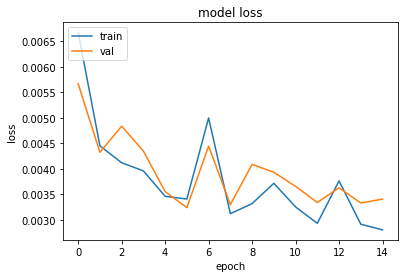

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
reveal_model = tf.keras.models.load_model("/content/drive/MyDrive/ML1_Course_Project/ImageInImageData/ImageInImage_YcbcrModel.h5")

In [ ]:
cover_test = np.load("/content/drive/MyDrive/ML1_Course_Project/ImageInImageData/Cover_Test_Ycbcr.npy")
secret_test = np.load("/content/drive/MyDrive/ML1_Course_Project/ImageInImageData/Secret_Test_Ycbcr.npy")

In [ ]:
observations = reveal_model.predict([secret_test, cover_test])
print(np.array(observations).shape)

(2, 200, 128, 128, 3)


In [ ]:
# Calculate Loss
audio_loss = []
cover_loss = []
for i in range(secret_test.shape[0]):
  audio_loss.append(tf.keras.losses.mean_squared_error(secret_test[i], observations[0][i]))
  cover_loss.append(tf.keras.losses.mean_squared_error(cover_test[i], observations[1][i]))

print(np.array(audio_loss).mean())
print(np.array(cover_loss).mean())

0.001457877
0.00035541662


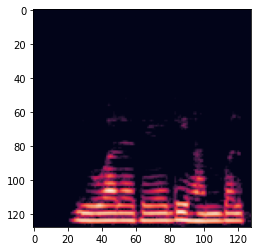

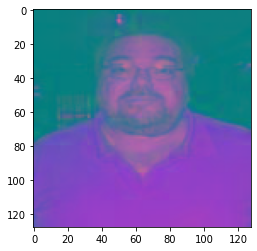

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


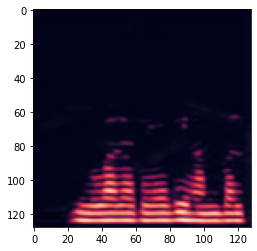

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


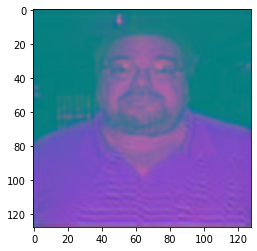

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(secret_test[0])
plt.show()
plt.imshow(cover_test[0])
plt.show()
plt.imshow(observations[0][0])
plt.show()
plt.imshow(observations[1][0])
plt.show()

In [ ]:
from skimage.metrics import structural_similarity as ssim
cover_test_ssim = []
secret_audio_test_ssim = []

for i in range(len(secret_test)):
  secret_audio_test_ssim.append(ssim(secret_test[i],observations[0][i],data_range=observations[0][i].max() - observations[0][i].min(),multichannel=True))
  cover_test_ssim.append(ssim(cover_test[i],observations[1][i],data_range=observations[1][i].max() - observations[1][i].min(),multichannel=True))

print("mean secret_audio_test_ssim:", np.array(secret_audio_test_ssim).mean())
print("mean cover_test_ssim:",np.array(cover_test_ssim).mean())

mean secret_audio_test_ssim: 0.922257989041282
mean cover_test_ssim: 0.9225694756301976


In [ ]:
import tensorflow as tf
# Calculate Loss
audio_loss = []
cover_loss = []
audio_psnr_o = []
audio_psnr_e = []
cover_psnr_o = []
cover_psnr_e = []
for i in range(secret_test.shape[0]):
  mse_secret = tf.keras.losses.mean_squared_error(secret_test[i], observations[0][i])
  mse_cover = tf.keras.losses.mean_squared_error(cover_test[i], observations[1][i])
  audio_loss.append(mse_secret)
  cover_loss.append(mse_cover)

  temp = np.square(np.max(secret_test[i]))
  temp = 10 * (np.log10(temp/mse_secret))
  audio_psnr_o.append(temp)

  temp = np.square(np.max(observations[0][i]))
  temp = 10 * (np.log10(temp/mse_secret))
  audio_psnr_e.append(temp)

  temp = np.square(np.max(cover_test[i]))
  temp = 10 * (np.log10(temp/mse_cover))
  cover_psnr_o.append(temp)

  temp = np.square(np.max(observations[1][i]))
  temp = 10 * (np.log10(temp/mse_cover))
  cover_psnr_e.append(temp)

print(np.array(audio_loss).mean())
print(np.array(cover_loss).mean())
print(np.array(audio_psnr_o).mean())
print(np.array(audio_psnr_e).mean())
print(np.array(cover_psnr_o).mean())
print(np.array(cover_psnr_e).mean())

0.001457877
0.00035541662
45.585762
46.460606
37.666325
37.565445


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


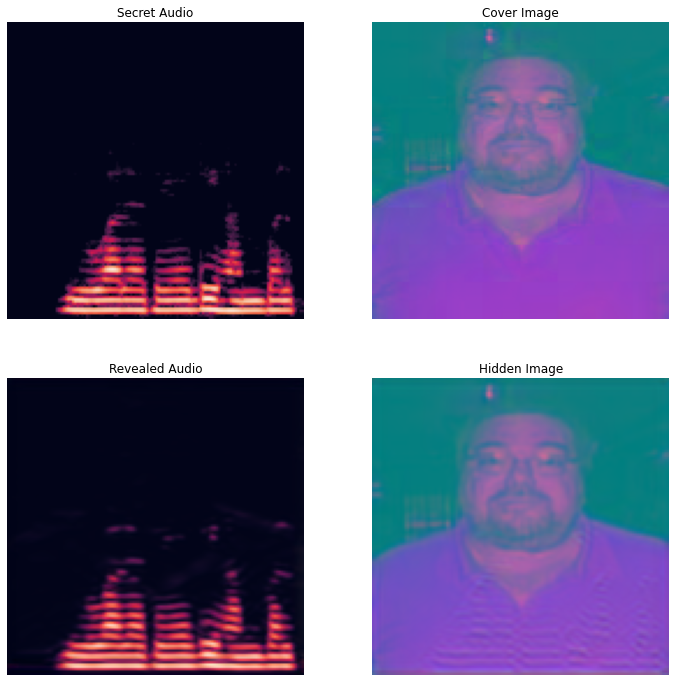

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


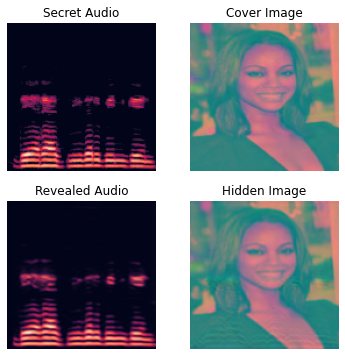

In [ ]:
import matplotlib.pyplot as plt
i = 0

fig = plt.figure(figsize=(12, 12))
fig.add_subplot(2, 2, 1)
plt.imshow(secret_test[i])
plt.axis('off')
plt.title("Secret Audio")
  
fig.add_subplot(2, 2, 2)
plt.imshow(cover_test[i])
plt.axis('off')
plt.title("Cover Image")
  
fig.add_subplot(2, 2, 3)
plt.imshow(observations[0][i])
plt.axis('off')
plt.title("Revealed Audio")
  
fig.add_subplot(2, 2, 4)
plt.imshow(observations[1][i])
plt.axis('off')
plt.title("Hidden Image")
plt.show()

i = 1
fig = plt.figure(figsize=(6, 6))
fig.add_subplot(2, 2, 1)
plt.imshow(secret_test[i])
plt.axis('off')
plt.title("Secret Audio")
  
fig.add_subplot(2, 2, 2)
plt.imshow(cover_test[i])
plt.axis('off')
plt.title("Cover Image")
  
fig.add_subplot(2, 2, 3)
plt.imshow(observations[0][i])
plt.axis('off')
plt.title("Revealed Audio")
  
fig.add_subplot(2, 2, 4)
plt.imshow(observations[1][i])
plt.axis('off')
plt.title("Hidden Image")
plt.show()